# Bankruptcy Predictive Models 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Basic EDA and Data Wrangling / Cleaning 

In [2]:
df = pd.read_csv('bank.csv')

In [3]:
print(df.isnull().sum())
#Checking if there is any null data 

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64


In [4]:
for column in df.columns:
    print(f"{column}: {df[column].isnull().sum()}")
#Double checking each column 

Bankrupt?: 0
 ROA(C) before interest and depreciation before interest: 0
 ROA(A) before interest and % after tax: 0
 ROA(B) before interest and depreciation after tax: 0
 Operating Gross Margin: 0
 Realized Sales Gross Margin: 0
 Operating Profit Rate: 0
 Pre-tax net Interest Rate: 0
 After-tax net Interest Rate: 0
 Non-industry income and expenditure/revenue: 0
 Continuous interest rate (after tax): 0
 Operating Expense Rate: 0
 Research and development expense rate: 0
 Cash flow rate: 0
 Interest-bearing debt interest rate: 0
 Tax rate (A): 0
 Net Value Per Share (B): 0
 Net Value Per Share (A): 0
 Net Value Per Share (C): 0
 Persistent EPS in the Last Four Seasons: 0
 Cash Flow Per Share: 0
 Revenue Per Share (Yuan ¥): 0
 Operating Profit Per Share (Yuan ¥): 0
 Per Share Net profit before tax (Yuan ¥): 0
 Realized Sales Gross Profit Growth Rate: 0
 Operating Profit Growth Rate: 0
 After-tax Net Profit Growth Rate: 0
 Regular Net Profit Growth Rate: 0
 Continuous Net Profit Growth Ra

In [5]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [6]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [7]:
df['Bankrupt?'].unique()
#Checking if target is binary 

array([1, 0])

In [8]:
percentage = df['Bankrupt?'].value_counts(normalize=True) * 100

percentage
#Looking for the percentage to see if data is imbalanced 

Bankrupt?
0    96.77372
1     3.22628
Name: proportion, dtype: float64

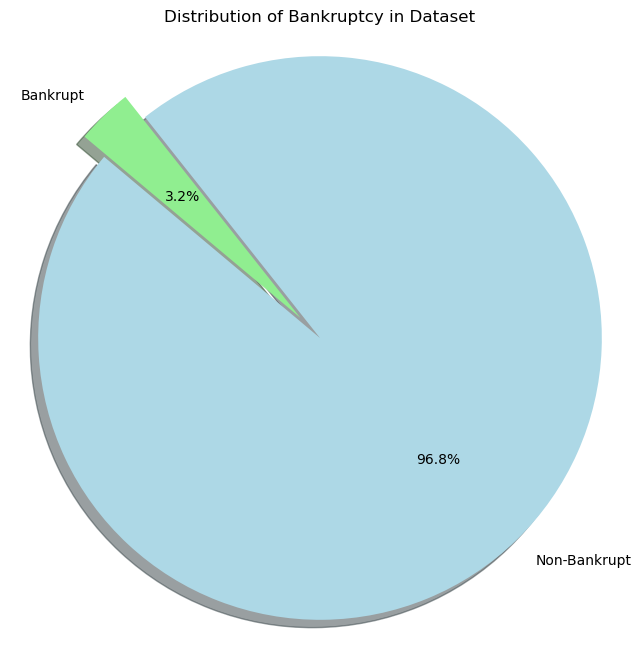

In [9]:
labels = 'Non-Bankrupt', 'Bankrupt'


colors = ['lightblue', 'lightgreen']


explode = (0, 0.1)  

plt.figure(figsize=(8, 8))
plt.pie(percentage, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.axis('equal')  

plt.title('Distribution of Bankruptcy in Dataset')
plt.show()
#Visualizing imbalance 

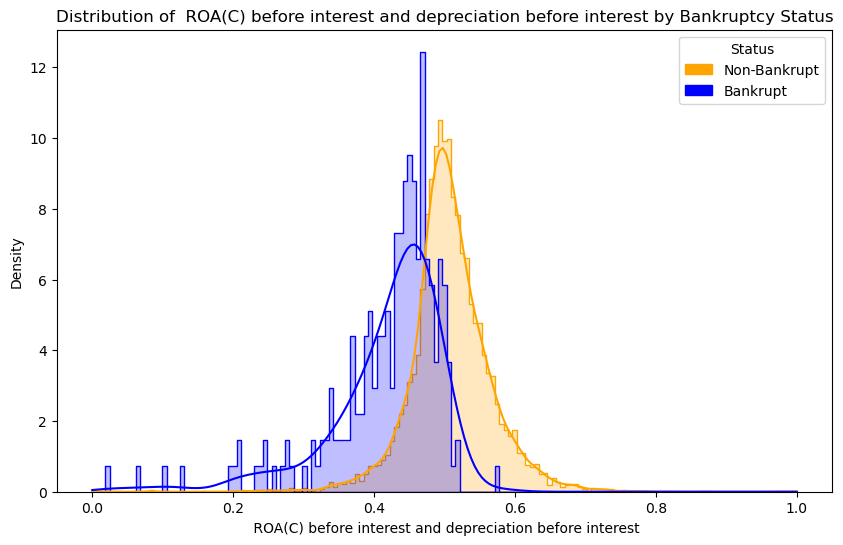

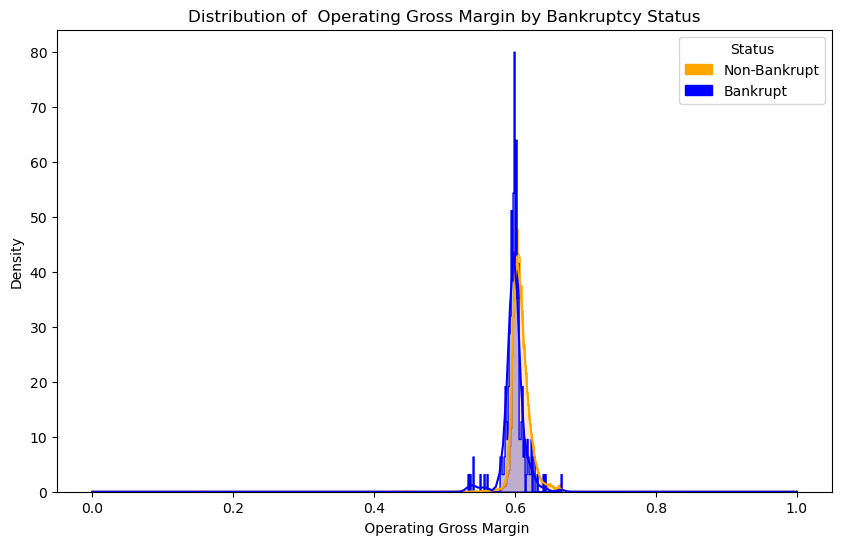

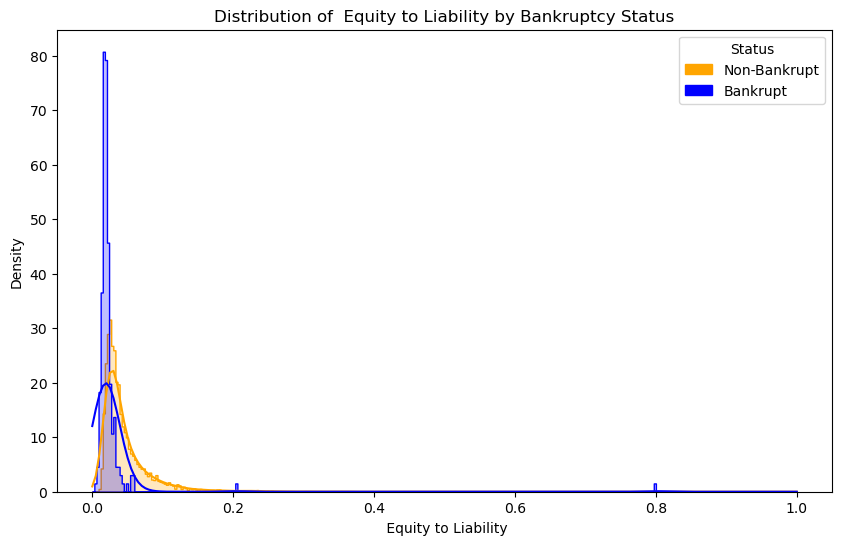

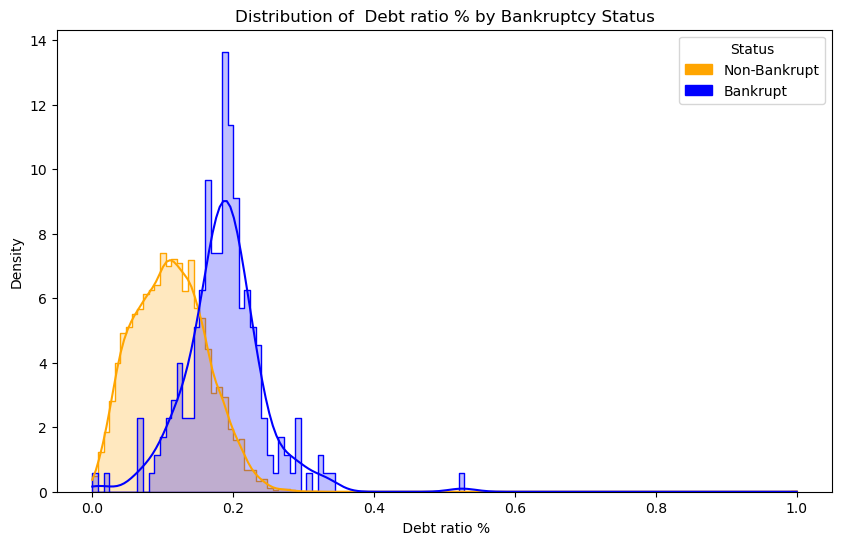

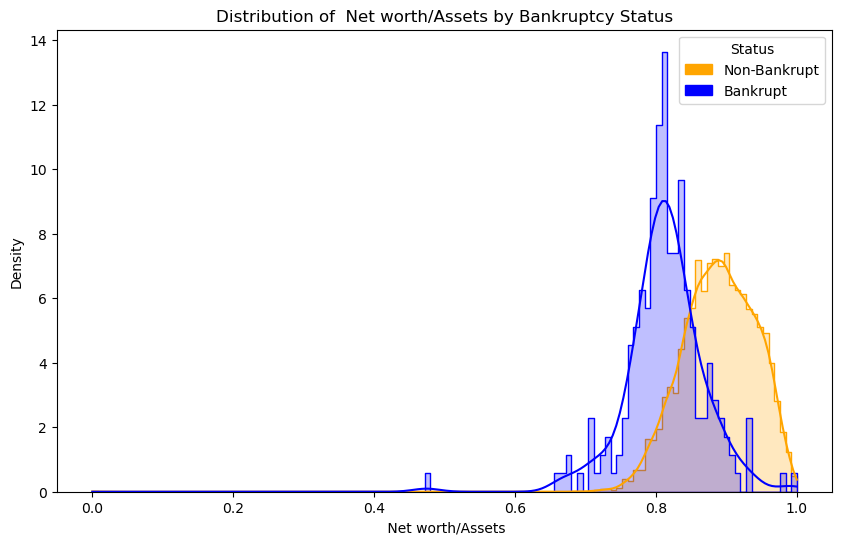

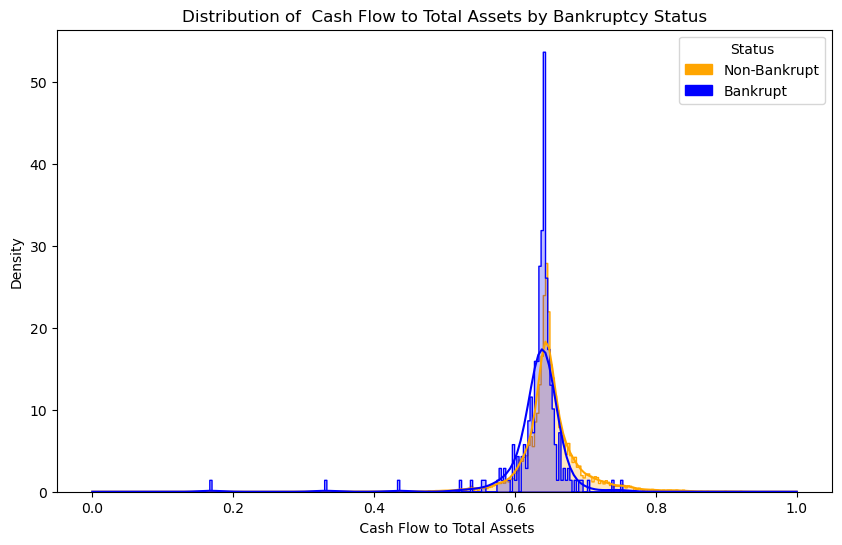

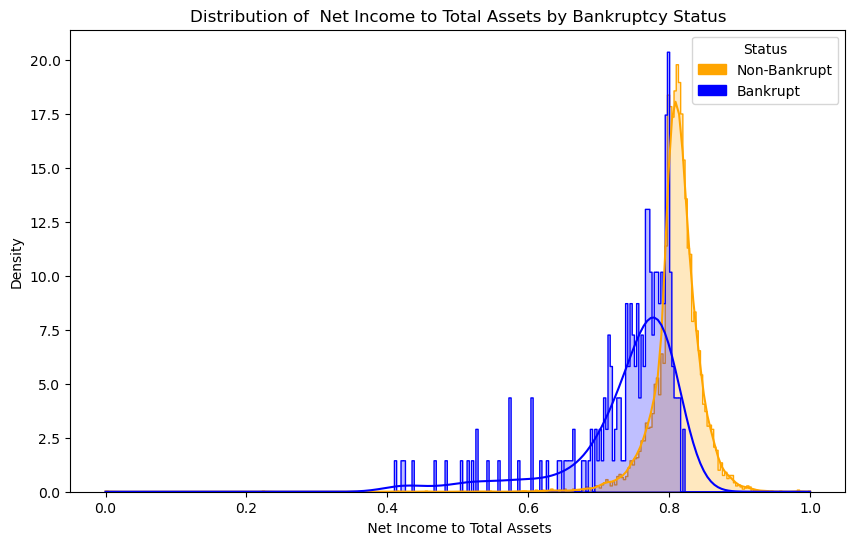

In [10]:
#Checking distributions of important features based on my domain knowledge 
features_to_visualize = [
    ' ROA(C) before interest and depreciation before interest', 
    ' Operating Gross Margin', 
    ' Equity to Liability', 
    ' Debt ratio %', 
    ' Net worth/Assets',  
    ' Cash Flow to Total Assets',  
    ' Net Income to Total Assets' 
]
df_copy = df.copy()

df_copy['Status'] = df_copy['Bankrupt?'].map({0: 'Non-Bankrupt', 1: 'Bankrupt'})

for feature in features_to_visualize:
    plt.figure(figsize=(10, 6))
    # Use the same palette as before
    palette = {'Non-Bankrupt': 'orange', 'Bankrupt': 'blue'}
    
    # Plot using the 'Status' column for hue, in the copied DataFrame
    sns.histplot(data=df_copy, x=feature, hue='Status', element='step', stat='density', common_norm=False, kde=True, palette=palette)
    plt.title(f'Distribution of {feature} by Bankruptcy Status')
    plt.xlabel(feature)
    plt.ylabel('Density')
    
    # Create a custom legend
    handles = [plt.Rectangle((0,0),1,1, color=palette[label]) for label in palette.keys()]
    plt.legend(handles, palette.keys(), title='Status')
    
    plt.show()





In [11]:
constant_features = [col for col in df.columns if df[col].nunique() == 1]

# Print the list of constant feature columns since this can mess up models
print("Constant features:", constant_features)


Constant features: [' Net Income Flag']


In [12]:
df = df.drop(' Net Income Flag', axis=1)
#Remove this feature 

In [13]:
df.columns
#Make sure the column is gone

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

# Organizing Data for Training/Testing and Functions to be Included in Pipeline

In [14]:
y = df['Bankrupt?']
Feature = [c for c in df.columns if c != 'Bankrupt?']
#Setting Target and features 

In [15]:
X = df[Feature]

In [16]:
y

0       1
1       1
2       1
3       1
4       1
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name: Bankrupt?, Length: 6819, dtype: int64

In [17]:
X

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,0.781588,...,0,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,0.029890
6815,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,0.781586,...,0,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,0.038284
6816,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,0.781546,...,0,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,0.097649
6817,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,0.781663,...,0,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,0.044009


In [18]:
def plot_confusion_matrix(y_true, y_pred, model_name, use_smote):
    conf_mat = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_mat, annot=True, fmt="d", cmap='Blues', cbar=False,
                xticklabels=['Predicted Non-Bankrupt', 'Predicted Bankrupt'],
                yticklabels=['Actual Non-Bankrupt', 'Actual Bankrupt'])
    plt.title(f'Confusion Matrix for {model_name} | SMOTE: {"Yes" if use_smote else "No"}')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

#Function to create confusion matrix for each model in pipeline 

In [19]:
!pip install -U scikit-learn imbalanced-learn
#Had issues with using smote and the regular pipeline, Installed this for compatiability 

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/6e/1b/66764ecf370e797759be06fb38c11640ea1f9456ae10f8640a33cfa726ea/imbalanced_learn-0.12.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 4.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.12.0
    Uninstalling imbalanced-learn-0.12.0:
      Successfully uninstalled imbalanced-learn-0.12.0


In [20]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline  # Use imblearn's pipeline for compatibility with SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#Splitting the data 80/20

In [22]:
def create_pipeline(model_name='logistic_regression', use_smote=True, k_features=10, n_pca_components=None):
    # Scale the data, standard scaler due to model choices
    scaler = StandardScaler()
    
    # Feature Selection Binary Classif so we can us f_classif since data is continious 
    feature_selection = SelectKBest(score_func=f_classif, k=k_features)
    
    # Want to see if using smote will make a difference or not, want the option to choose to use it or skip it
    smote = SMOTE() if use_smote else 'passthrough'
    
    # PCA was used because after running models without it, it boosted model preformance while trying to reduce overfitting
    #and dimensionality 
    pca = PCA(n_components=n_pca_components) if n_pca_components is not None else 'passthrough'

    
    # Choosing the models
    if model_name == 'logistic_regression':
        classifier = LogisticRegression(max_iter=1000)
    elif model_name == 'knn':
        classifier = KNeighborsClassifier()
    elif model_name == 'random_forest':
        classifier = RandomForestClassifier(random_state=42)
    elif model_name == 'adaboost':
        classifier = AdaBoostClassifier(n_estimators=50, random_state=42, algorithm='SAMME')

    
    # Combine steps into a pipeline
    steps = [('scaler', scaler), ('feature_selection', feature_selection), 
             ('smote', smote), ('pca', pca), ('classifier', classifier)]
    pipeline = ImbPipeline(steps=steps)
    
    return pipeline


In [23]:
from sklearn.model_selection import GridSearchCV

#  How each model will be configured for the pipeline, each one has to be looped over
model_configs = [
    {'name': 'logistic_regression', 'use_smote': False, 'n_pca_components': 0.95},
    {'name': 'logistic_regression', 'use_smote': True, 'n_pca_components': 0.95},
    {'name': 'knn', 'use_smote': False, 'n_pca_components': 0.95},
    {'name': 'knn', 'use_smote': True, 'n_pca_components': 0.95},
    {'name': 'random_forest', 'use_smote': False, 'n_pca_components': 0.95},
    {'name': 'random_forest', 'use_smote': True, 'n_pca_components': 0.95},
    {'name': 'adaboost', 'use_smote': False, 'n_pca_components': 0.95},
    {'name': 'adaboost', 'use_smote': True, 'n_pca_components': 0.95}
]



In [24]:

#Stratify data since its imbalanced 
from sklearn.model_selection import StratifiedKFold, GridSearchCV
stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#param grid to see how many features for each model 
param_grid = {
    'feature_selection__k': [5, 10, 15, 20, 25, 30, 'all'] 
}



Model: logistic_regression | SMOTE: No
Best parameters: {'feature_selection__k': 10}
Best ROC-AUC score: 0.927396852752303



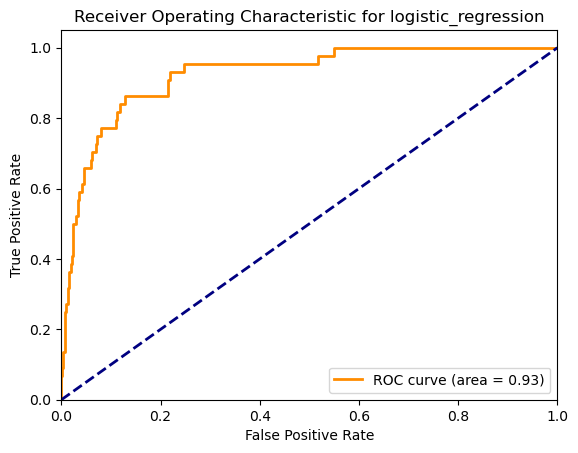

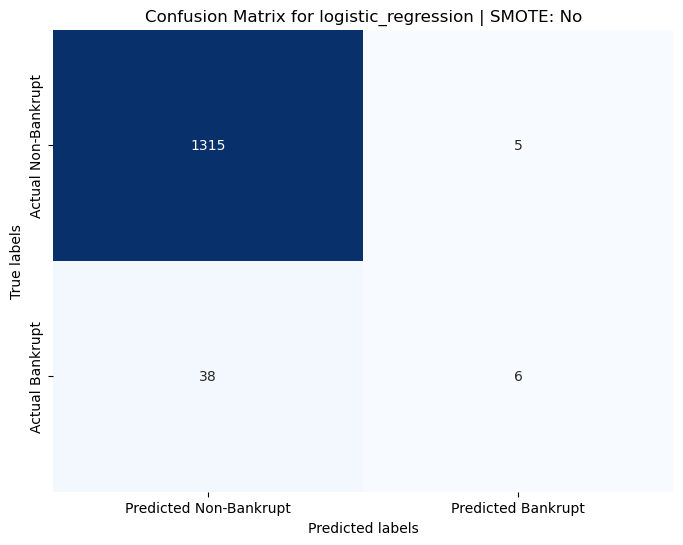

Selected features (10): [' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Persistent EPS in the Last Four Seasons', ' Debt ratio %', ' Net worth/Assets', ' Net profit before tax/Paid-in capital', ' Retained Earnings to Total Assets', ' Net Income to Total Assets', " Net Income to Stockholder's Equity"]

Classification Report for logistic_regression | SMOTE: No:

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1320
           1       0.55      0.14      0.22        44

    accuracy                           0.97      1364
   macro avg       0.76      0.57      0.60      1364
weighted avg       0.96      0.97      0.96      1364

-------------------------------------------------------

Model: logistic_regression | SMOTE: Yes
Best parameters: {'feature_selection__k': 15}
Best ROC-AUC score: 0.9248748572386013



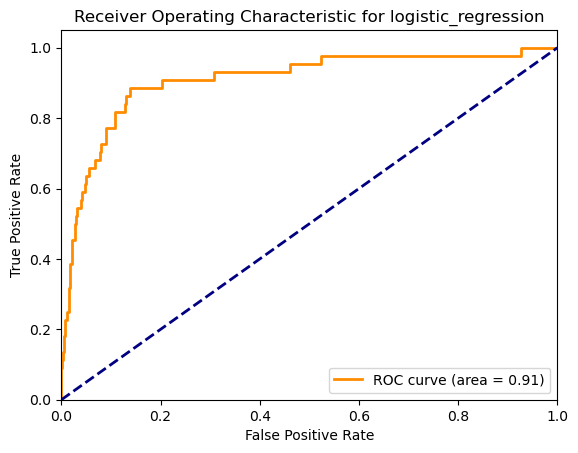

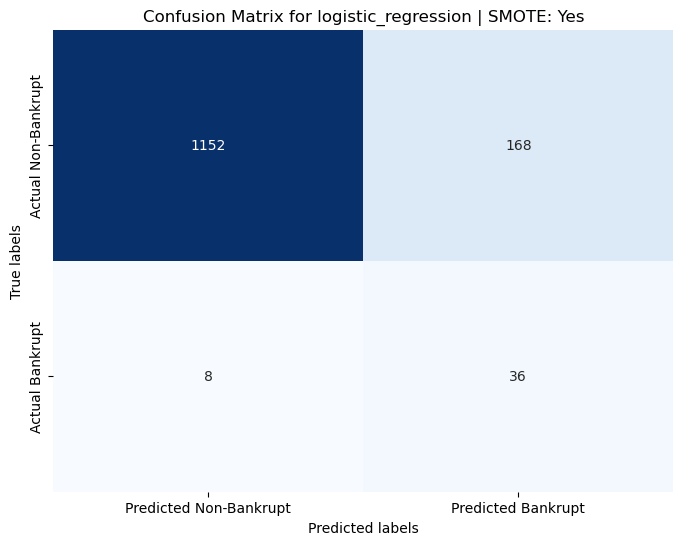

Selected features (15): [' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Persistent EPS in the Last Four Seasons', ' Per Share Net profit before tax (Yuan ¥)', ' Debt ratio %', ' Net worth/Assets', ' Borrowing dependency', ' Net profit before tax/Paid-in capital', ' Working Capital to Total Assets', ' Current Liability to Assets', ' Retained Earnings to Total Assets', ' Current Liability to Current Assets', ' Net Income to Total Assets', " Net Income to Stockholder's Equity"]

Classification Report for logistic_regression | SMOTE: Yes:

              precision    recall  f1-score   support

           0       0.99      0.87      0.93      1320
           1       0.18      0.82      0.29        44

    accuracy                           0.87      1364
   macro avg       0.58      0.85      0.61      1364
weighted avg       0.97      0.87      0.91      1364

-------------------

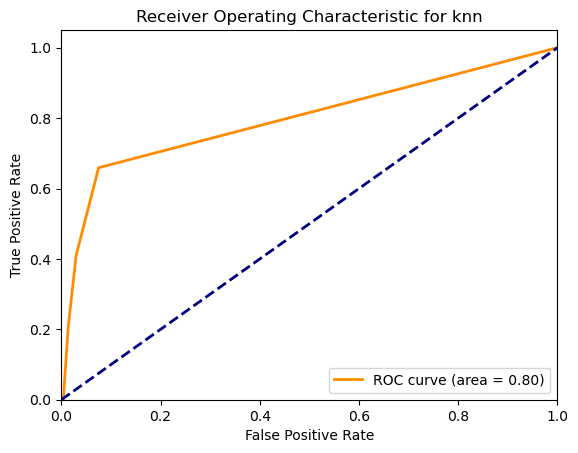

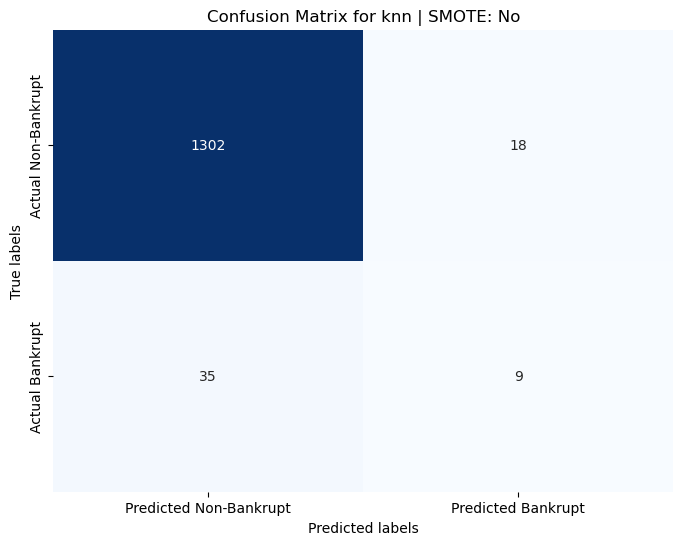

Selected features (5): [' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Debt ratio %', ' Net Income to Total Assets']

Classification Report for knn | SMOTE: No:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1320
           1       0.33      0.20      0.25        44

    accuracy                           0.96      1364
   macro avg       0.65      0.60      0.62      1364
weighted avg       0.95      0.96      0.96      1364

-------------------------------------------------------

Model: knn | SMOTE: Yes
Best parameters: {'feature_selection__k': 5}
Best ROC-AUC score: 0.8475591519460004



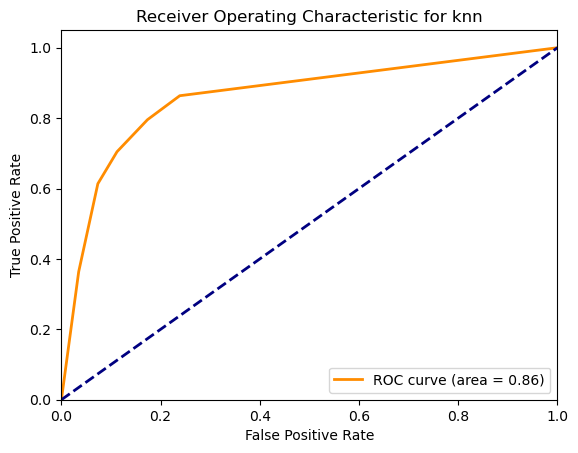

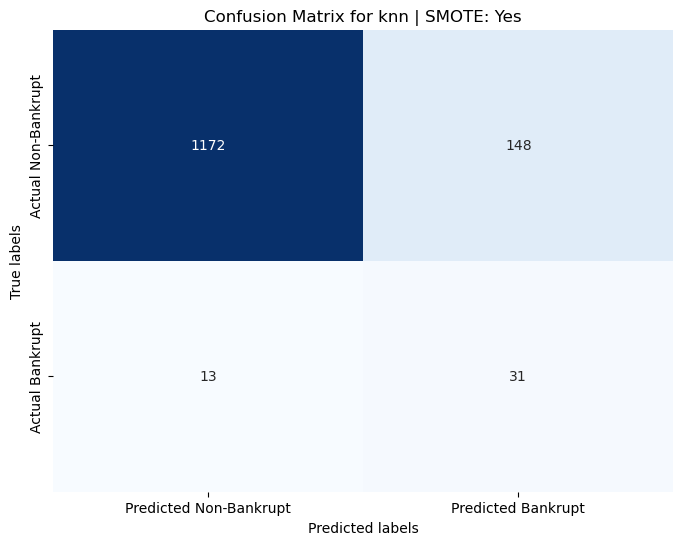

Selected features (5): [' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Debt ratio %', ' Net Income to Total Assets']

Classification Report for knn | SMOTE: Yes:

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1320
           1       0.17      0.70      0.28        44

    accuracy                           0.88      1364
   macro avg       0.58      0.80      0.61      1364
weighted avg       0.96      0.88      0.91      1364

-------------------------------------------------------

Model: random_forest | SMOTE: No
Best parameters: {'feature_selection__k': 20}
Best ROC-AUC score: 0.9047489451043953



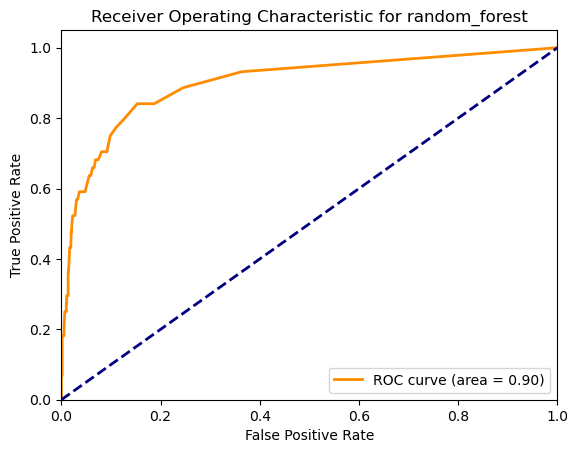

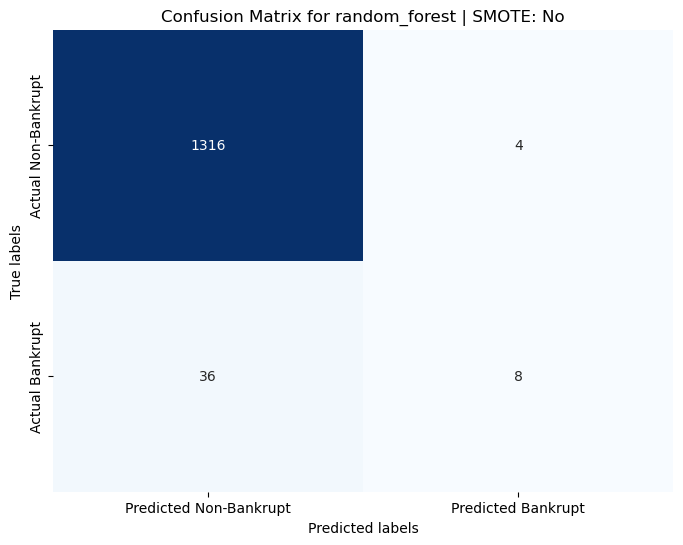

Selected features (20): [' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Persistent EPS in the Last Four Seasons', ' Per Share Net profit before tax (Yuan ¥)', ' Debt ratio %', ' Net worth/Assets', ' Borrowing dependency', ' Net profit before tax/Paid-in capital', ' Working Capital to Total Assets', ' Current Liability to Assets', ' Current Liabilities/Equity', ' Retained Earnings to Total Assets', ' Current Liability to Equity', ' Current Liability to Current Assets', ' Net Income to Total Assets', " Net Income to Stockholder's Equity", ' Liability to Equity']

Classification Report for random_forest | SMOTE: No:

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1320
           1       0.67      0.18      0.29        44

    accuracy                           0.97   

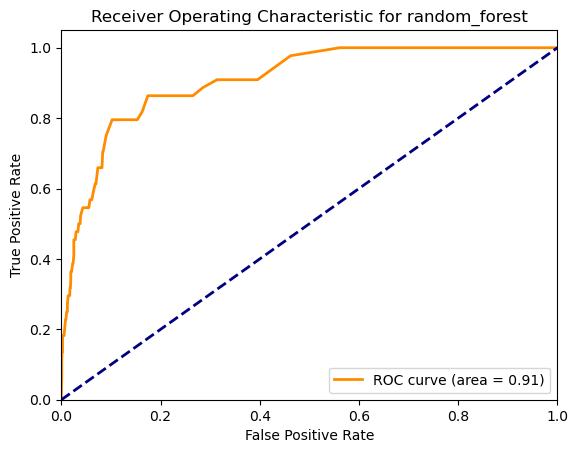

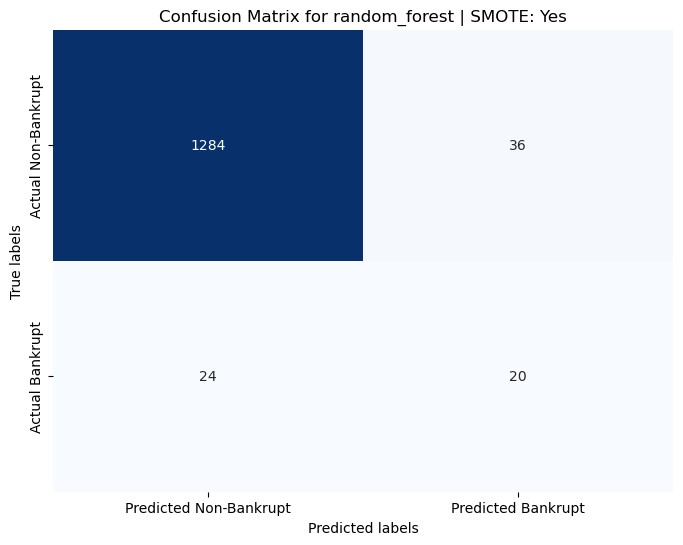

Selected features (94): [' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Operating Gross Margin', ' Realized Sales Gross Margin', ' Operating Profit Rate', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Operating Expense Rate', ' Research and development expense rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)', ' Per Share Net profit before tax (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate', ' Regular Net Profit Growth Rate', ' Continuous Net Pro

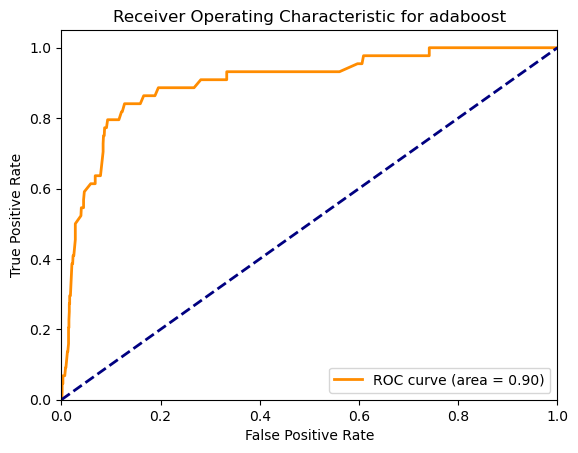

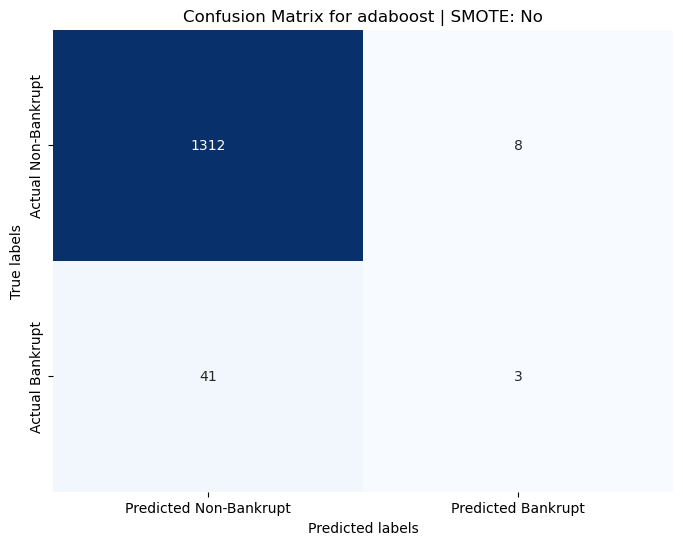

Selected features (25): [' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons', ' Operating Profit Per Share (Yuan ¥)', ' Per Share Net profit before tax (Yuan ¥)', ' Debt ratio %', ' Net worth/Assets', ' Borrowing dependency', ' Operating profit/Paid-in capital', ' Net profit before tax/Paid-in capital', ' Working Capital to Total Assets', ' Current Liability to Assets', ' Working Capital/Equity', ' Current Liabilities/Equity', ' Retained Earnings to Total Assets', ' Total expense/Assets', ' Current Liability to Equity', ' Current Liability to Current Assets', ' Net Income to Total Assets', " Net Income to Stockholder's Equity", ' Liability to Equity']

Classification Report for adaboost | SMOTE: No:

              precision    recall  f1-score   support

   

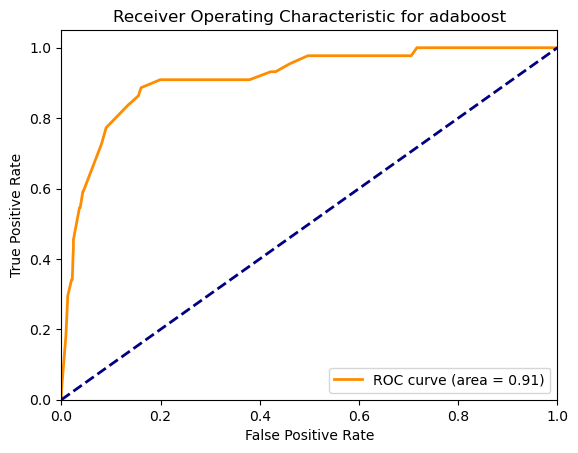

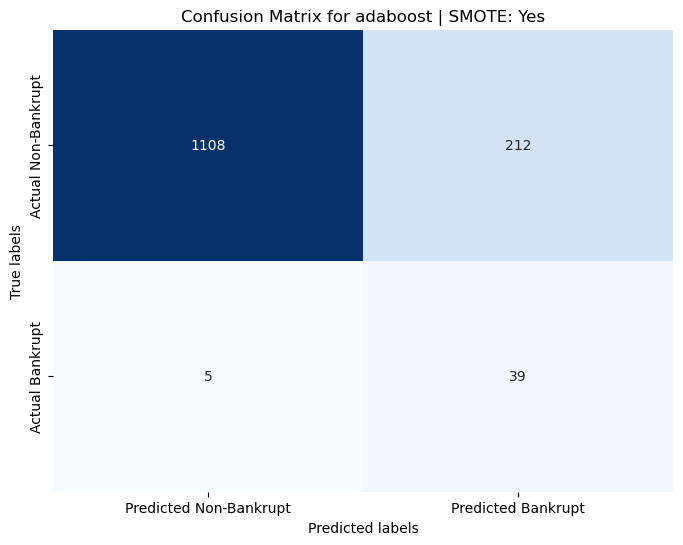

Selected features (15): [' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Persistent EPS in the Last Four Seasons', ' Per Share Net profit before tax (Yuan ¥)', ' Debt ratio %', ' Net worth/Assets', ' Borrowing dependency', ' Net profit before tax/Paid-in capital', ' Working Capital to Total Assets', ' Current Liability to Assets', ' Retained Earnings to Total Assets', ' Current Liability to Current Assets', ' Net Income to Total Assets', " Net Income to Stockholder's Equity"]

Classification Report for adaboost | SMOTE: Yes:

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      1320
           1       0.16      0.89      0.26        44

    accuracy                           0.84      1364
   macro avg       0.58      0.86      0.59      1364
weighted avg       0.97      0.84      0.89      1364

------------------------------

In [25]:
from sklearn.metrics import roc_curve, auc

for config in model_configs:
    # Create pipeline for the current model configuration
    pipeline = create_pipeline(
        model_name=config['name'],
        use_smote=config['use_smote'],
        k_features=10,
        n_pca_components=config.get('n_pca_components')
    )
    
    # Set up the grid search
    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        cv=stratified_k_fold,
        scoring='roc_auc'
    )
    
    # Perform the grid search on the training data
    grid_search.fit(X_train, y_train)
    
    # Access the best hyperparameters and estimators 
    best_params = grid_search.best_params_
    best_estimator = grid_search.best_estimator_
    best_score = grid_search.best_score_
    
    # Print the best parameters and ROC-AUC score
    print(f"Model: {config['name']} | SMOTE: {'Yes' if config['use_smote'] else 'No'}")
    print(f"Best parameters: {best_params}")
    print(f"Best ROC-AUC score: {best_score}\n")
    
    # Plot ROC curve for the best estimator
    y_pred_prob = best_estimator.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for {config["name"]}')
    plt.legend(loc="lower right")
    plt.show()
    
    # Predict on the test set using the best estimators
    y_pred = best_estimator.predict(X_test)
    
    # Plot the confusion matrix
    plot_confusion_matrix(y_test, y_pred, config['name'], config['use_smote'])
    
    # Get the names of the selected features
    select_k_best = best_estimator.named_steps['feature_selection']
    mask = select_k_best.get_support()
    selected_features = [feature for bool, feature in zip(mask, Feature) if bool]
    print(f"Selected features ({len(selected_features)}): {selected_features}\n")
    
    # Print the classification report
    print(f"Classification Report for {config['name']} | SMOTE: {'Yes' if config['use_smote'] else 'No'}:\n")
    print(classification_report(y_test, y_pred))
    print("-------------------------------------------------------\n")


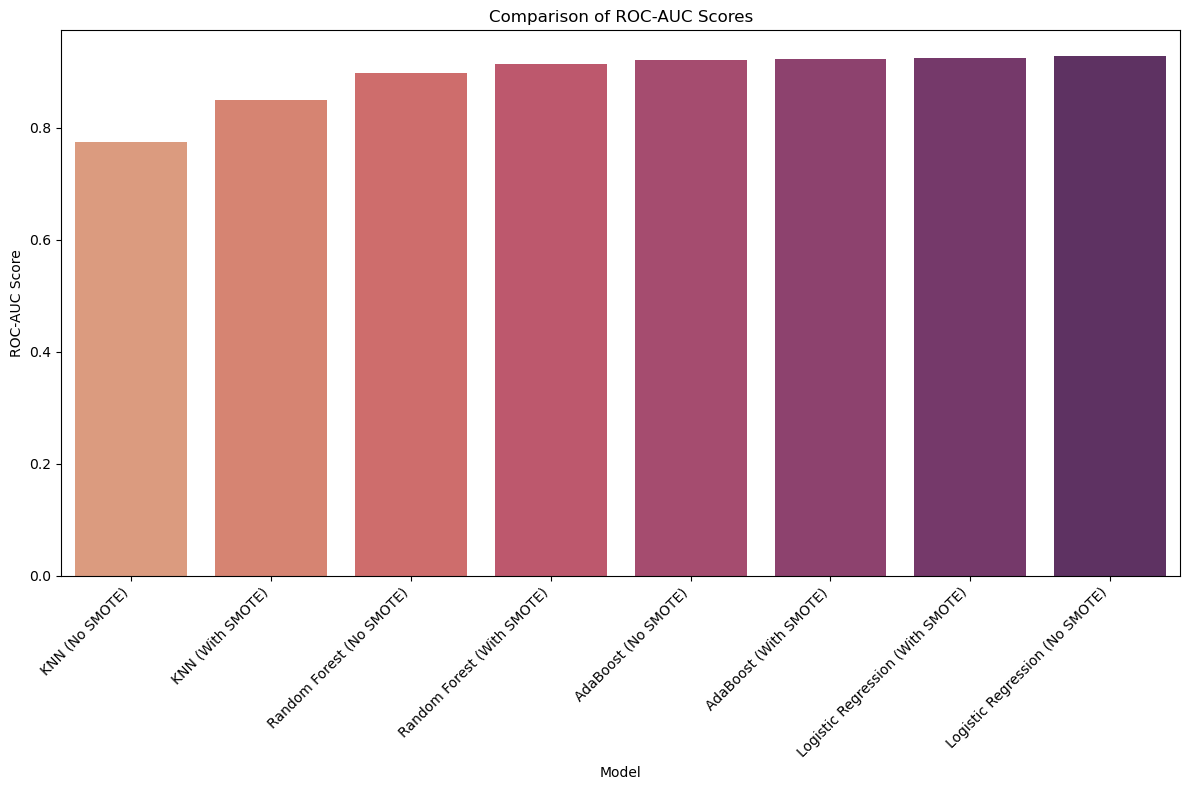

In [26]:
roc_auc_scores = {
    'Logistic Regression (No SMOTE)': 0.927396852752303,
    'Logistic Regression (With SMOTE)': 0.9245947798909885,
    'KNN (No SMOTE)': 0.7736293837152842,
    'KNN (With SMOTE)': 0.8491354344049842,
    'Random Forest (No SMOTE)': 0.8971889639454806,
    'Random Forest (With SMOTE)': 0.913544586009041,
    'AdaBoost (No SMOTE)': 0.920096376766993,
    'AdaBoost (With SMOTE)': 0.9229779429364738
}

# Convert dictionary to DataFrame for easy plotting
df_scores = pd.DataFrame(list(roc_auc_scores.items()), columns=['Model', 'ROC-AUC Score'])

# Sort the DataFrame by ROC-AUC Score for better visualization in order to see the lowest scores to the highest
df_scores.sort_values('ROC-AUC Score', inplace=True)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='ROC-AUC Score', data=df_scores, palette='flare', orient='v')
plt.title('Comparison of ROC-AUC Scores')
plt.xlabel('Model')
plt.ylabel('ROC-AUC Score')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

# Results: 

In [ ]:
#The most balanced model has to be the Random Forest with SMOTE. This is due to its ability to have comparable
#ROC Curves and ROC_AUC scores with the other high performing models but has a much better F_1 score while maintaining
#a high overall accuracy as well. As we can see by the confusion matrix here, it predicted 12 less false negatives 
#which could save tons of money in the future. The trade off is an increase of predicting bankrupt companies that
#were not bankrupt. The reason this trade off is worth it is that increasing caution in those false positives and 
#looking into those companies with a sharper eye is much better than predicting that they are going to be fine and 
#then they go bankrupt in the future causing millions of potential losses. 